## Here we are using gensim models instead of sklearn.

### 1. Input Type:

#### scikit-learn's TfidfVectorizer takes raw text as input (a list of documents).

#### gensim's TfidfModel expects a BoW corpus (a list of lists of tuples where each tuple contains the word ID and its frequency in a document).

### 2. Output Format:

#### scikit-learn returns a dense or sparse matrix where each document is represented as a vector of TF-IDF values.
#### gensim returns a sparse representation of TF-IDF values in the form of a list of tuples for each document.

### 3. Scalability

#### gensim is optimized for larger corpora and can efficiently handle large-scale datasets, making it more suitable for topics like topic modeling or working with vast text collections.

#### scikit-learn is more commonly used in machine learning workflows with smaller-to-medium-sized datasets.


### 4. Preprocessing:

#### scikit-learn's TfidfVectorizer has built-in preprocessing capabilities like stopword removal, tokenization, and stemming (if configured).

#### gensim requires manual preprocessing of the text (like tokenization and possibly removing stopwords) before creating the BoW corpus.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Venky\Downloads\latest_ticket_data.csv")
df.head()

,Description,Category
0,hi since recruiter lead permission approve req...,Application
1,re expire days hi ask help update passwords co...,Application
2,verification warning hi has got attached pleas...,Application
3,please dear looks blacklisted receiving mails ...,Application
4,dear modules report report cost thank much reg...,Application


In [4]:
df['Category'].unique()

array(['Application', 'Database', 'Network', 'User Maintenance',
       'Security'], dtype=object)

In [5]:
df['Category'].value_counts()

Category
Application         600
Database            600
Network             600
User Maintenance    600
Security            600
Name: count, dtype: int64

In [6]:
print(df.count())
print("\n")
print("Null values \n \n",df.isnull().sum())

Description    3000
Category       3000
dtype: int64


Null values 
 
 Description    0
Category       0
dtype: int64


In [7]:
df['target'] = df['Category'].astype('category').cat.codes

df['target'].value_counts()

target
0    600
1    600
2    600
4    600
3    600
Name: count, dtype: int64

In [8]:
df['target'].unique()

array([0, 1, 2, 4, 3], dtype=int8)

In [9]:
x='hi since recruiter lead permission approve'
len(x.split())

6

In [10]:
df['Num_words'] = df['Description'].apply(lambda x: len(x.split()))

In [11]:
df['Num_words'].max(),df['Num_words'].min()

(927, 1)

### Making bins to check word distribution 

In [12]:
df['bins'] = pd.cut(df['Num_words'],bins = [0,100,300,500,800,np.inf],labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [13]:
df.head(10)

,Description,Category,target,Num_words,bins
0,hi since recruiter lead permission approve req...,Application,0,12,0-100
1,re expire days hi ask help update passwords co...,Application,0,140,100-300
2,verification warning hi has got attached pleas...,Application,0,14,0-100
3,please dear looks blacklisted receiving mails ...,Application,0,14,0-100
4,dear modules report report cost thank much reg...,Application,0,8,0-100
5,please action reports dear way help close thes...,Application,0,87,0-100
6,hello please fill date,Application,0,4,0-100
7,secondary hi please provide secondary ledger u...,Application,0,22,0-100
8,copy hi receive copy behavior expect receive m...,Application,0,11,0-100
9,invitation strategy workshop february manchest...,Application,0,141,100-300


In [14]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:"Count"})
word_distribution

C:\Users\Venky\AppData\Local\Temp\ipykernel_31672\539775543.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:"Count"})


,bins,Count
0,0-100,2817
1,100-300,162
2,300-500,15
3,500-800,2
4,>800,4


Text(0.5, 1.0, 'Word Distribution per Bin')

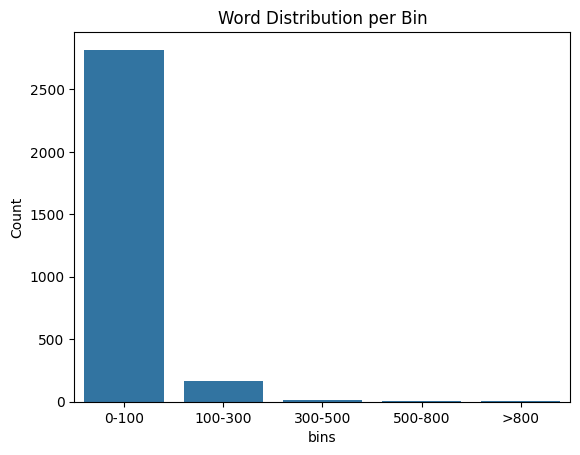

In [15]:
sns.barplot(x='bins',y='Count',data=word_distribution).set_title("Word Distribution per Bin")

In [16]:
num_cat_class = len(np.unique(df['Category'].values))
y = df['target'].values


### Topic Modelling

#### Topic modeling is a technique in Natural Language Processing (NLP) used to identify the underlying topics within a collection of text documents. It helps in discovering hidden semantic structures in large text corpora, making it easier to organize, understand, and summarize the data.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import re
import warnings
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [18]:
df.dtypes

Description      object
Category         object
target             int8
Num_words         int64
bins           category
dtype: object

In [19]:
df['Description'] = df['Description'].astype(str)
df.dtypes

Description      object
Category         object
target             int8
Num_words         int64
bins           category
dtype: object

In [20]:
description_data = df['Description'].values

type(description_data)

numpy.ndarray

In [21]:
count_vec = CountVectorizer(stop_words="english",analyzer="word",ngram_range=(1,1),max_df=1,min_df=1,max_features=None)

# convert text data into term-frequency matrix
description_data_vec = count_vec.fit_transform(description_data)

tfidf_transformer = TfidfTransformer()


# convert term-frequency matrix into tf-idf
tfdif_matrix = tfidf_transformer.fit_transform(description_data_vec)
tfdif_matrix
# create dictionary to find a tfidf word each word
word2tfdif = dict(zip(count_vec.get_feature_names_out(),tfidf_transformer.idf_))

for word,score in word2tfdif.items():
    print(word,score)

abnormal 8.313553664880422
abort 8.313553664880422
abroad 8.313553664880422
absent 8.313553664880422
absolutely 8.313553664880422
ac 8.313553664880422
accessibility 8.313553664880422
accident 8.313553664880422
accidental 8.313553664880422
accommodate 8.313553664880422
accomplish 8.313553664880422
accomplished 8.313553664880422
accountable 8.313553664880422
accrual 8.313553664880422
accurately 8.313553664880422
ace 8.313553664880422
achievable 8.313553664880422
acknowledging 8.313553664880422
acre 8.313553664880422
adapt 8.313553664880422
adaptors 8.313553664880422
adder 8.313553664880422
adhesive 8.313553664880422
adjacency 8.313553664880422
adjusted 8.313553664880422
administers 8.313553664880422
adv 8.313553664880422
advancement 8.313553664880422
advantageous 8.313553664880422
advantages 8.313553664880422
advertisement 8.313553664880422
advertising 8.313553664880422
advisors 8.313553664880422
advisory 8.313553664880422
affiliate 8.313553664880422
affiliated 8.313553664880422
afford 8

In [22]:
count_vec.vocabulary_

{'recruiter': 1288,
 'requisitions': 1353,
 'technically': 1615,
 'secondary': 1439,
 'dad': 399,
 'journey': 885,
 'unleash': 1714,
 'optimise': 1074,
 'embrace': 538,
 'busby': 211,
 'campus': 229,
 'birmingham': 170,
 'footer': 674,
 'accessibility': 6,
 'matters': 978,
 'undelivered': 1702,
 'rcpt': 1264,
 'arriving': 93,
 'cloning': 282,
 'specialists': 1503,
 'dancing': 400,
 'hammer': 745,
 'muffin': 1033,
 'crazy': 385,
 'rotterdam': 1401,
 'represented': 1349,
 'institutional': 844,
 'creator': 386,
 'duplicates': 507,
 'revise': 1383,
 'contributors': 358,
 'evaluating': 579,
 'clarifying': 276,
 'excerpt': 589,
 'informs': 827,
 'limitations': 927,
 'moderators': 1021,
 'moderated': 1020,
 'expanded': 598,
 'altogether': 51,
 'seal': 1432,
 'locale': 930,
 'buyer': 212,
 'dynamics': 509,
 'indexing': 816,
 'gal': 701,
 'registries': 1311,
 'certainty': 251,
 'carrier': 238,
 'population': 1175,
 'importing': 801,
 'doubled': 494,
 'corrections': 371,
 'selecting': 1445,
 'cu

In [23]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names_out())

feature_names[sorted_by_idf[:5]] # Lowest idf
feature_names[sorted_by_idf[-5:0]]

array([], dtype=object)

In [24]:
len(sorted_by_idf)

1794

In [25]:
final_doc = df['Description']
all_doc = tuple(final_doc)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdif_vectorizer = TfidfVectorizer()
tfdif_matrix = tfdif_vectorizer.fit_transform(all_doc)
tfdif_matrix.shape
print(tfdif_matrix)


  (0, 2101)	0.08626144127793878
  (0, 4178)	0.20563798743451187
  (0, 3647)	0.729155421951029
  (0, 2513)	0.1738031714611934
  (0, 3201)	0.26585087961564136
  (0, 265)	0.23545400931874272
  (0, 3820)	0.3645777109755145
  (0, 2670)	0.2860029411187468
  (0, 3274)	0.06031024879919189
  (0, 2668)	0.18254043930267794
  (0, 4576)	0.10299806622237614
  (1, 2101)	0.03624479915859737
  (1, 3274)	0.038011181285886944
  (1, 3572)	0.09748851917727884
  (1, 1686)	0.2843825725738265
  (1, 1156)	0.1652784930225683
  (1, 310)	0.0397574685934633
  (1, 2087)	0.05318503239712903
  (1, 4846)	0.03918402844581676
  (1, 3155)	0.07020701992458687
  (1, 835)	0.038644198757393236
  (1, 4574)	0.017867571836612323
  (1, 3284)	0.05016616734260602
  (1, 2210)	0.07232773442737224
  (1, 2105)	0.0690830715959424
  :	:
  (2999, 2436)	0.1002338918060217
  (2999, 2875)	0.1582767949475123
  (2999, 1210)	0.17727442589055542
  (2999, 5055)	0.16731196181627883
  (2999, 4212)	0.13942498318403396
  (2999, 2870)	0.1502810169916

In [42]:
import gensim
from gensim.utils import simple_preprocess
z ="Hello are you doing"
stemmer = PorterStemmer()
for token in gensim.utils.simple_preprocess(z):
    print('token is ',token)
    print('lemmatizatoin ',WordNetLemmatizer().lemmatize(token,pos='v'))
    print('stemming ',stemmer.stem(WordNetLemmatizer().lemmatize(token,pos='v')))



token is  hello
lemmatizatoin  hello
stemming  hello
token is  are
lemmatizatoin  be
stemming  be
token is  you
lemmatizatoin  you
stemming  you
token is  doing
lemmatizatoin  do
stemming  do


In [87]:
import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *

def lemmatize_stemming(txt):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(txt,pos='v'))

def pre_process(txt):
    res=[]
    for token in gensim.utils.simple_preprocess(txt):
        res.append(lemmatize_stemming(token))

    return res


In [65]:
len(df['Description'])

3000

In [ ]:
data = df['Description'].reset_index() # This adds the index as a column, named 'index'
#data['index'] = data.index
#data = data.reset_index(drop=True) # drop=True avoids adding the old index as a column
data[:5]


,index,Description
0,0,hi since recruiter lead permission approve req...
1,1,re expire days hi ask help update passwords co...
2,2,verification warning hi has got attached pleas...
3,3,please dear looks blacklisted receiving mails ...
4,4,dear modules report report cost thank much reg...


In [129]:
data.dtypes

index           int64
Description    object
dtype: object

In [133]:
data[data.index == 0].values

array([[0,
        'hi since recruiter lead permission approve requisitions makes please make thanks recruiter']],
      dtype=object)

In [69]:
len(data)

3000

In [70]:
data.shape

(3000, 2)

In [73]:
len(data['index'] == 10)

3000

In [ ]:
data[data['index'] == 5 ].values[0][1]

'please action reports dear way help close these maternity leave complete submit her left he technically left he client work after rd submit after delete period days two public holidays possible add thanks please action reports dear part established processes each required submit his weekly basis each friday past must submitted receiving because reports haven followed process please help cascade accordingly gets possible breakdown reports please note refers has left maternity other absence leave please update person record otherwise please person directly submit country date total days'

### Sample code below  for tfidf Model

## Process Overview

### 1. Preprocessing: 

You preprocess your text data (tokenization, stopword removal, stemming/lemmatization).

### 2. BoW Creation: 
You convert the processed documents into a Bag of Words (BoW) corpus, where each document is represented as a sparse vector of word counts.

### 3. TF-IDF Calculation:

The BoW corpus is then passed to the TfidfModel, which transforms the word counts into TF-IDF scores (indicating the importance of each word in each document relative to the entire corpus).

In [ ]:
from gensim import corpora, models
from pprint import pprint

# Example documents
processed_docs = [["cat", "dog"], ["dog", "cat", "cat"], ["cat", "dog", "dog"]]

# Create a dictionary
dictionary = corpora.Dictionary(processed_docs)

# Convert the documents to a Bag of Words (BoW) format
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Create the TF-IDF model using the BoW corpus
tfidf = models.TfidfModel(bow_corpus)

# Transform the corpus using TF-IDF
corpus_tfidf = tfidf[bow_corpus]

# Print the first document's TF-IDF representation
for doc in corpus_tfidf:
    pprint(doc)
    break


## Step 1 : Pre Processing

In [98]:
sample_doc = data[data['index'] == 2 ].values[0][1]
words = []
for word in sample_doc.split(' '):
    words.append(word)
print("Original doc \n ")
print(words)

print('\n tokenized and lemmatized document: \n ')

print(pre_process(sample_doc))
processed_docs  = data['Description'].apply(lambda x: pre_process(x))
processed_docs[:5]


Original doc 
 
['verification', 'warning', 'hi', 'has', 'got', 'attached', 'please', 'addresses', 'best', 'regards', 'monitoring', 'analyst', 'verification', 'warning']

 tokenized and lemmatized document: 
 
['verif', 'warn', 'hi', 'have', 'get', 'attach', 'pleas', 'address', 'best', 'regard', 'monitor', 'analyst', 'verif', 'warn']


0    [hi, sinc, recruit, lead, permiss, approv, req...
1    [re, expir, day, hi, ask, help, updat, passwor...
2    [verif, warn, hi, have, get, attach, pleas, ad...
3    [pleas, dear, look, blacklist, receiv, mail, a...
4    [dear, modul, report, report, cost, thank, muc...
Name: Description, dtype: object

## Step 2: Create BOW 

In [103]:

# Create a dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)
cnt =0
for k,v in dictionary.items():
    print(k,v)
    cnt +=1
    if cnt >10:
        break

# Convert the documents to a Bag of Words (BoW) format
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]



0 approv
1 hi
2 lead
3 make
4 permiss
5 pleas
6 recruit
7 requisit
8 sinc
9 thank
10 about


**TF-IDF Model**:


#### The TF-IDF (Term Frequency - Inverse Document Frequency) model is used to reflect the importance of a word within a document relative to its frequency across the entire corpus. The formula is:

#### TF (Term Frequency): How often a term appears in a document.
#### IDF (Inverse Document Frequency): How rare the term is across all documents.

## Step 3: TF-IDF Calculation

In [113]:
from gensim import corpora, models
from pprint import pprint

 # Create the TF-IDF model using the BoW corpus
tfidf = models.TfidfModel(bow_corpus)

# Transform the corpus using TF-IDF

corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    pprint(doc)
    break

# (0, 0.1993500744274599) --> here 0 is position of the word in the dictionary and 0.199 is its TD-IDF Score 

[(0, 0.1993500744274599),
 (1, 0.050884531673560454),
 (2, 0.1615722108061699),
 (3, 0.3211524823355082),
 (4, 0.24293142553688898),
 (5, 0.021000605861310796),
 (6, 0.772823316311369),
 (7, 0.357836677089344),
 (8, 0.20710242044871693),
 (9, 0.027834058751576973)]


## What LDA Does:
### LDA (Latent Dirichlet Allocation) is a probabilistic model used for topic modeling. The goal of LDA is to find a set of topics that explain the underlying structure in a collection of documents.

Each document is represented as a mixture of topics, and each topic is represented by a distribution over words.

### The LDA model assumes that:

1. Each document is a mixture of topics (e.g., a document might be 60% Topic 1, 30% Topic 2, and 10% Topic 3).
2. Each topic is a distribution over words (e.g., Topic 1 might be about "sports" and contain words like "football," "game," "player").

### LdaMulticore
 is a parallelized version of LDA, which speeds up training by utilizing multiple CPU cores.

## Explanation of Each Parameter:
### 1. bow_corpus:

This is the Bag of Words (BoW) corpus. It is a list of documents where each document is represented as a list of tuples. Each tuple contains the word's ID (from the dictionary) and its frequency in the document.
This corpus is created by converting raw text documents into a numerical representation (BoW), where each document is converted into a vector of word counts.

### 2. num_topics=5:

This specifies the number of topics you want the LDA model to discover in your corpus.
In this case, the model will find 5 topics. Topics are distributions over words, meaning that each topic will be represented as a set of words that frequently occur together in the documents.
The model will try to assign each document a mixture of these 5 topics.

### 3. id2word=dictionary:

This argument provides a mapping between the word IDs (which are integers) and the actual words in the dictionary.
The dictionary is created earlier in the code, and it maps the word IDs (e.g., 0, 1, 2...) to words (e.g., "cat", "dog", "tree").
This helps the model understand which word each ID corresponds to.

### 4. passes=2:

This parameter specifies how many passes (iterations) the algorithm will make over the entire corpus during training.
A pass means that the model will iterate over the whole corpus to update the topic distributions.
In this case, it will pass through the corpus 2 times.
More passes usually lead to better models, but also require more computational time.

### 5. workers=2:

This specifies the number of workers (or processes) that will be used to parallelize the LDA model training.
In this case, workers=2 means that the computation will be split between 2 CPU cores. This helps speed up training when working with large datasets.
If you have more cores available, you can increase this number to further parallelize the task.

In [115]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [119]:
import pickle

res = lda_model.print_topics(num_topics=5,num_words=5)
#print(f"result is {res}")

for idx,topic in lda_model.print_topics(-1): # -1 means all topics
    print(f" topic is {idx} and words are {topic}")

 topic is 0 and words are 0.018*"hi" + 0.018*"pleas" + 0.017*"thank" + 0.015*"regard" + 0.015*"event" + 0.012*"re" + 0.012*"detail" + 0.010*"chang" + 0.010*"leaver" + 0.009*"do"
 topic is 1 and words are 0.037*"pleas" + 0.019*"thank" + 0.017*"card" + 0.016*"regard" + 0.016*"re" + 0.014*"pm" + 0.013*"si" + 0.013*"la" + 0.012*"hello" + 0.011*"hi"
 topic is 2 and words are 0.030*"pleas" + 0.018*"name" + 0.018*"thank" + 0.011*"regard" + 0.011*"report" + 0.011*"hi" + 0.009*"re" + 0.009*"detail" + 0.008*"hello" + 0.008*"dear"
 topic is 3 and words are 0.033*"card" + 0.027*"pleas" + 0.023*"thank" + 0.021*"send" + 0.017*"you" + 0.017*"hi" + 0.014*"access" + 0.013*"for" + 0.013*"hello" + 0.013*"have"
 topic is 4 and words are 0.048*"pleas" + 0.024*"thank" + 0.019*"regard" + 0.015*"hello" + 0.014*"hi" + 0.013*"have" + 0.013*"you" + 0.009*"send" + 0.008*"best" + 0.008*"issu"


In [136]:
with open('lda_result.txt','w') as f:
    for s in res:
        f.write(str(s) + "\n")

In [137]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
bow_corpus[0]
#hi since recruiter lead permission approve requisitions makes please make thanks recruiter'

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1)]

In [135]:
lda_model[bow_corpus[0]] # It means first doc says 47% on topic 2 and 3 and .01% on topic 0,1 and 4

[(0, 0.015790671),
 (1, 0.015791854),
 (2, 0.49907663),
 (3, 0.40411657),
 (4, 0.06522424)]